In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
 
def parser(x):
	return pd.datetime.strptime('190'+x, '%Y-%m')
 
df = pd.read_csv('shampoo_sales.csv', 
                    header=0, parse_dates=[0], index_col=0, 
                    date_parser=parser)


df

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


In [2]:
from statsmodels.tsa.stattools import adfuller
adftest= adfuller(df)
print(f' PVALUE: {adftest[1]}')

 PVALUE: 1.0


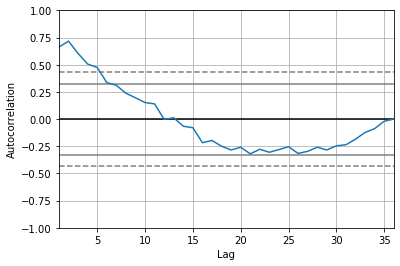

In [3]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
plt.show()

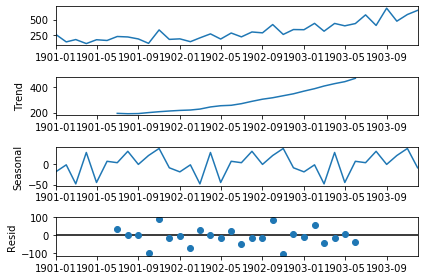

In [4]:
import statsmodels.api as sm
decomposition= sm.tsa.seasonal_decompose(df, model='addictive')
fig= decomposition.plot()
plt.show()

In [7]:
#2 years data for training, last 1 year data for testing
train= df[:24]
test= df[24:]
test


,Sales
Month,
1903-01-01,339.7
1903-02-01,440.4
1903-03-01,315.9
1903-04-01,439.3
1903-05-01,401.3
1903-06-01,437.4
1903-07-01,575.5
1903-08-01,407.6
1903-09-01,682.0


In [8]:
#random model
from statsmodels.tsa.arima.model import ARIMA

model= ARIMA(train, order=(5,0,4)).fit()
preds= model.predict(start= len(train), end= len(df)-1)

from sklearn.metrics import mean_squared_error


np.sqrt(mean_squared_error(test,preds))

232.00217726261437

# FIND PDQ

In [9]:
import itertools
p= range(0,8)
d= range(0,8)
q= range(0,2)
pdq_combinations= list(itertools.product(p,d,q))
len(pdq_combinations)

128

In [10]:
rmse= []
order1=[]
for pdq in pdq_combinations:
    model= ARIMA(train, order=pdq).fit()
    pred= model.predict(start= len(train), end= len(df)-1)
    error= np.sqrt(mean_squared_error(test,pred))
    rmse.append(error)
    order1.append(pdq)

results= pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])
results

,RMSE
"(0, 0, 0)",2.730522e+02
"(0, 0, 1)",2.722626e+02
"(0, 1, 0)",1.765160e+02
"(0, 1, 1)",2.013848e+02
"(0, 2, 0)",4.182910e+02
...,...
"(7, 5, 1)",1.453755e+03
"(7, 6, 0)",2.348177e+04
"(7, 6, 1)",1.138497e+04
"(7, 7, 0)",8.105447e+05


In [11]:
filtercond= results.RMSE==results.RMSE.min()
pdq_val=results.loc[filtercond].index.values
best_pdq=tuple(pdq_val.reshape(1, -1)[0])[0]
best_pdq


(6, 3, 1)

In [12]:
model= ARIMA(train, order=best_pdq).fit()
preds= model.predict(start= len(train), end= len(df)-1)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test,preds))

68.12659167178658

In [13]:
for_next=4
predictions= model.predict(len(df), len(df)+for_next)
predictions

1904-01-01    667.968148
1904-02-01    689.118458
1904-03-01    726.393139
1904-04-01    763.865851
1904-05-01    796.306671
Freq: MS, Name: predicted_mean, dtype: float64